In [1]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.plotting import *
from aeons.endpoint import *
# Set default figure size to (4,2)
plt.rcParams['figure.figsize'] = (4,2)

## Rastrigin

In [11]:
from anesthetic import read_chains
samples = read_chains(f'{proj_dir}/PolyChordLite/chains/rastrigin')

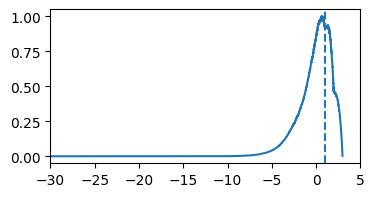

In [12]:
plt.plot(samples.logL, samples.get_weights())
plt.xlim(-30, 5)
plt.axvline(x=samples.logL.mean(), ls='--')

In [83]:
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = samples.logX().iloc[true_endpoint]

In [4]:
iterations = np.linspace(0.05*true_endpoint, true_endpoint, 10, endpoint=False, dtype=int)
logXfs, logXfs_std = model.logXfs(theta_bandwidth_trunc, iterations, Nset=25, splits=[1])
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 722 complete, 15 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 2094 complete, 23 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 3467 complete, 21 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 4839 complete, 17 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 6211 complete, 17 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 7584 complete, 23 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 8956 complete, 22 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 10328 complete, 23 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 11701 complete, 17 samples


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


Iteration 13073 complete, 21 samples


(0.0, 14446.0)

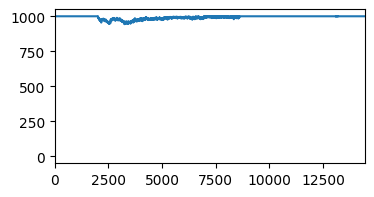

In [5]:
samples.nlive.plot()
plt.xlim(0, true_endpoint)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


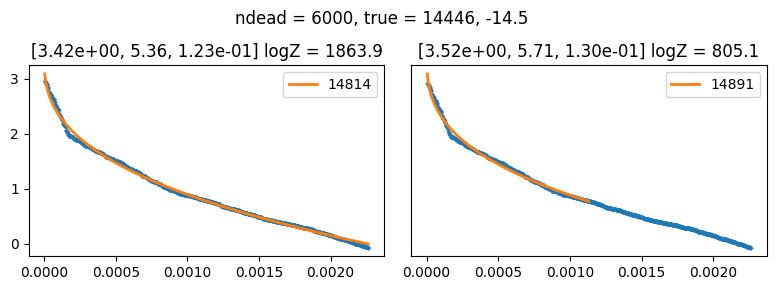

In [6]:
plot_split(model, ndead=6000, nlive=1000)

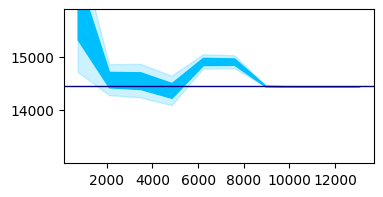

In [112]:
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0.9, 1.1))

In [19]:
name, samples = get_samples('lcdm', 'planck')

In [20]:
samples.logX().mean(), samples.D_KL()

(-39.117216564620584, 36.59302770893926)

## Gaussian

In [2]:
name, samples = get_samples('toy', 'gauss_30_01')
model = EndModel(samples)
true_endpoint = model.true_endpoint()

In [3]:
samples.D_KL()

84.7828435816685

In [5]:
samples.logX().mean()

-87.54089704033734

In [10]:
np.log(2000)/20

0.38004512297710413

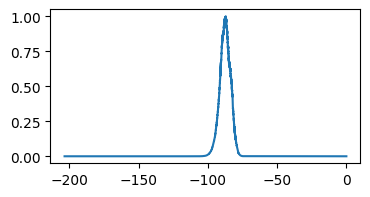

In [4]:
plt.plot(samples.logX(), samples.get_weights())

In [250]:
points = points_at_iteration(samples, ndead=40000).recompute()
dead_points = points.iloc[:-500].recompute()
live_points = points.iloc[-500:]

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


<Axes: >

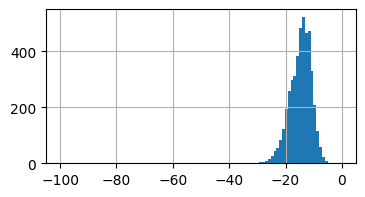

In [245]:
samples.logL.hist(bins=np.linspace(-100, 0, 100))

<Axes: >

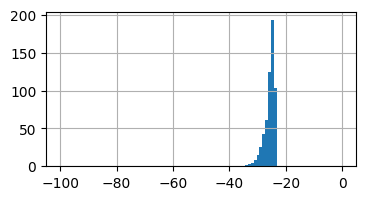

In [251]:
dead_points.logL.hist(bins=np.linspace(-100, 0, 100))

(array([219., 124.,  70.,  41.,  18.,  15.,   7.,   4.,   1.,   1.]),
 array([-23.87461159, -23.01208784, -22.1495641 , -21.28704035,
        -20.4245166 , -19.56199285, -18.69946911, -17.83694536,
        -16.97442161, -16.11189786, -15.24937412]),
 <BarContainer object of 10 artists>)

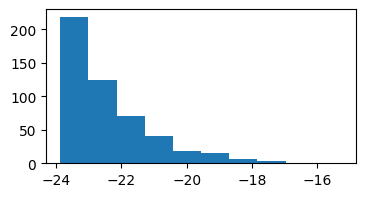

In [253]:
# live_points.logL.hist(bins=np.linspace(-100, 0, 100))
plt.hist(live_points.logL.values)

(array([  784.,   867.,  1054.,  1112.,  1396.,  1664.,  2163.,  3091.,
         5334., 81773.]),
 array([-4.99990749e+03, -4.49991730e+03, -3.99992712e+03, -3.49993694e+03,
        -2.99994676e+03, -2.49995657e+03, -1.99996639e+03, -1.49997621e+03,
        -9.99986026e+02, -4.99995843e+02, -5.66070779e-03]),
 <BarContainer object of 10 artists>)

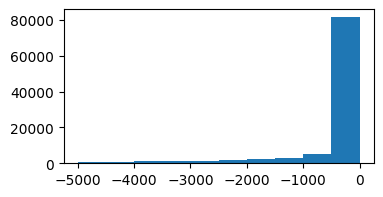

In [243]:
plt.hist(samples.logL.values)